# Creating GeoDataFrame from a DataFrame with coordinates #

In [1]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

# From Longitudes and Latitudes, creating dataframe #
df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
    'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
    'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
    'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]}
)


In [2]:
# GeoDataframe requires shapely object, use points_from_xy() from geopandas to make lat and long columns into list of shapely.point #

gdf = geopandas.GeoDataFrame(df, geometry = geopandas.points_from_xy(df.Longitude, df.Latitude))




c:\Users\gschlett\Downloads\Coding\Anaconda\envs\MovingPandasWS\lib\site-packages\geopandas\array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


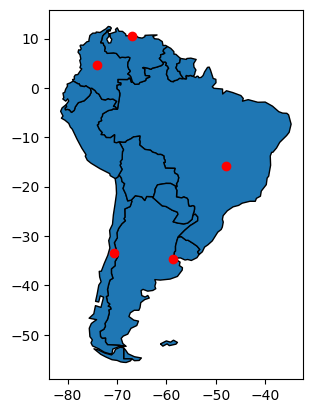

In [3]:
# Then plot coordinates # 

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres')) # Tying in basemap #

ax = world[world.continent == 'South America'].plot(edgecolor = 'black') # to edit color of basemap under plot(color = 'red', edgecolor = 'black')

# Plot Geodataframe #
gdf.plot(ax = ax, color = 'red') # color = red specifies color of points on map 

plt.show()




# From WKT Format

In [4]:
# WKT meaning well known text format, coordinates are in one column instead of split into two # #### Can't get WKT to work #

dfw = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Coordinates': ['POINT(-58.66 -34.58)', 'POINT(-47.91 -15.78)',
                     'POINT(-70.66 -33.45)', 'POINT(-74.08 4.60)',
                     'POINT(-66.86 10.48)']})



In [5]:
from shapely import wkt

dfw['Coordinates'] = geopandas.GeoSeries.from_wkt(dfw['Coordinates']) 

In [6]:
gdf = geopandas.GeoDataFrame(dfw, geometry = 'Coordinates')

print(gdf.head())

           City    Country                  Coordinates
0  Buenos Aires  Argentina  POINT (-58.66000 -34.58000)
1      Brasilia     Brazil  POINT (-47.91000 -15.78000)
2      Santiago      Chile  POINT (-70.66000 -33.45000)
3        Bogota   Colombia    POINT (-74.08000 4.60000)
4       Caracas  Venezuela   POINT (-66.86000 10.48000)


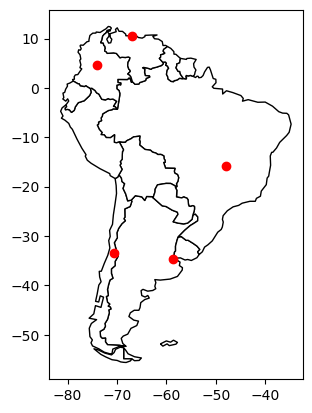

In [7]:
axs = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')

gdf.plot(ax=axs, color='red')

plt.show()